###### Predicting Survival in the Titanic Data Set 
###### We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.
###### https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv

###### You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived

In [236]:
import numpy as np
import pandas as pd

In [237]:
#read dataset
df= pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [238]:
#Check information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [239]:
def createBarChart(features):
    survived_pclass = df[df['Survived']==1][features].value_counts()
    Notsurvived_pclass = df[df['Survived']==0][features].value_counts()
    df_chart= pd.DataFrame([survived_pclass,Notsurvived_pclass])
    df_chart.index=['survived','Notsurvived']
    df_chart.plot(kind='bar',stacked=True,figsize=(10,5))

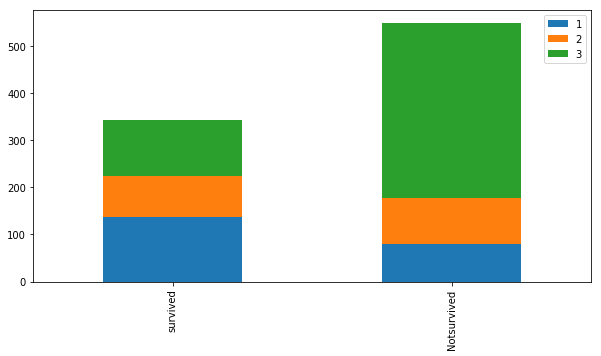

In [240]:
#Servival chart for Pclass
createBarChart('Pclass')
#Analysis -> pClass=1 has more survival rate

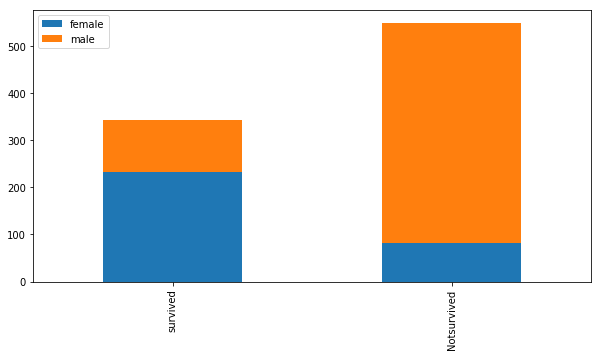

In [241]:
#Servival chart for Sex
createBarChart('Sex')
#Analysis -> female has more survival rate than man

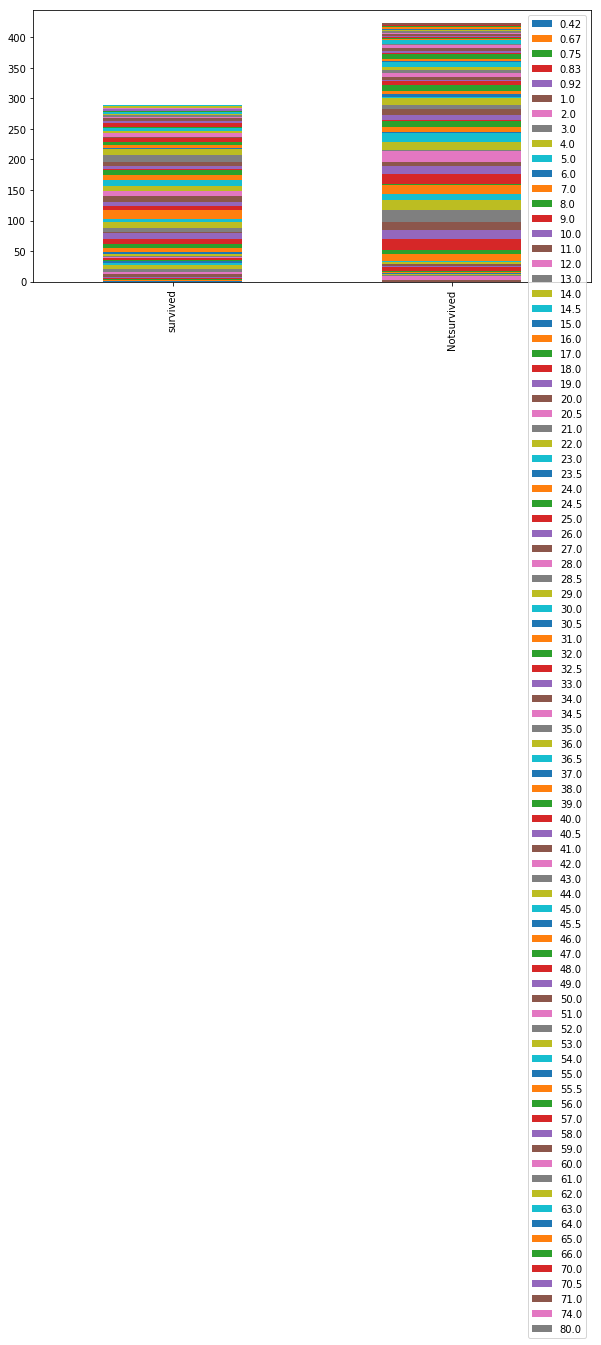

In [242]:
#Servival chart for Age
createBarChart('Age')
#Analysis -> 

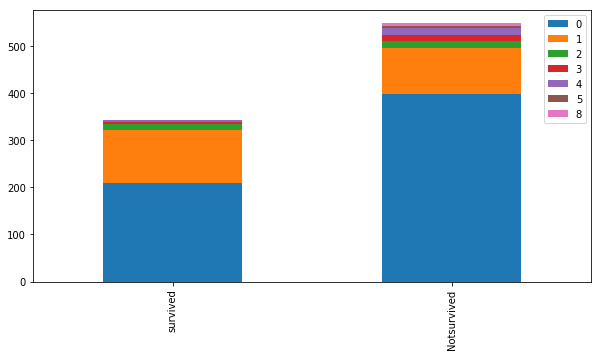

In [243]:
#Servival chart for SibSp
createBarChart('SibSp')
#Analysis -> 

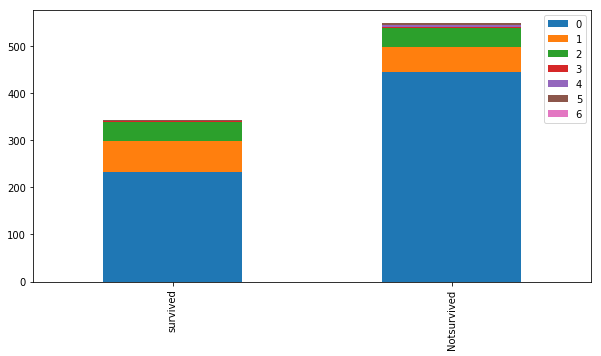

In [244]:
 #Servival chart for Parch
createBarChart('Parch')
#Analysis -> 

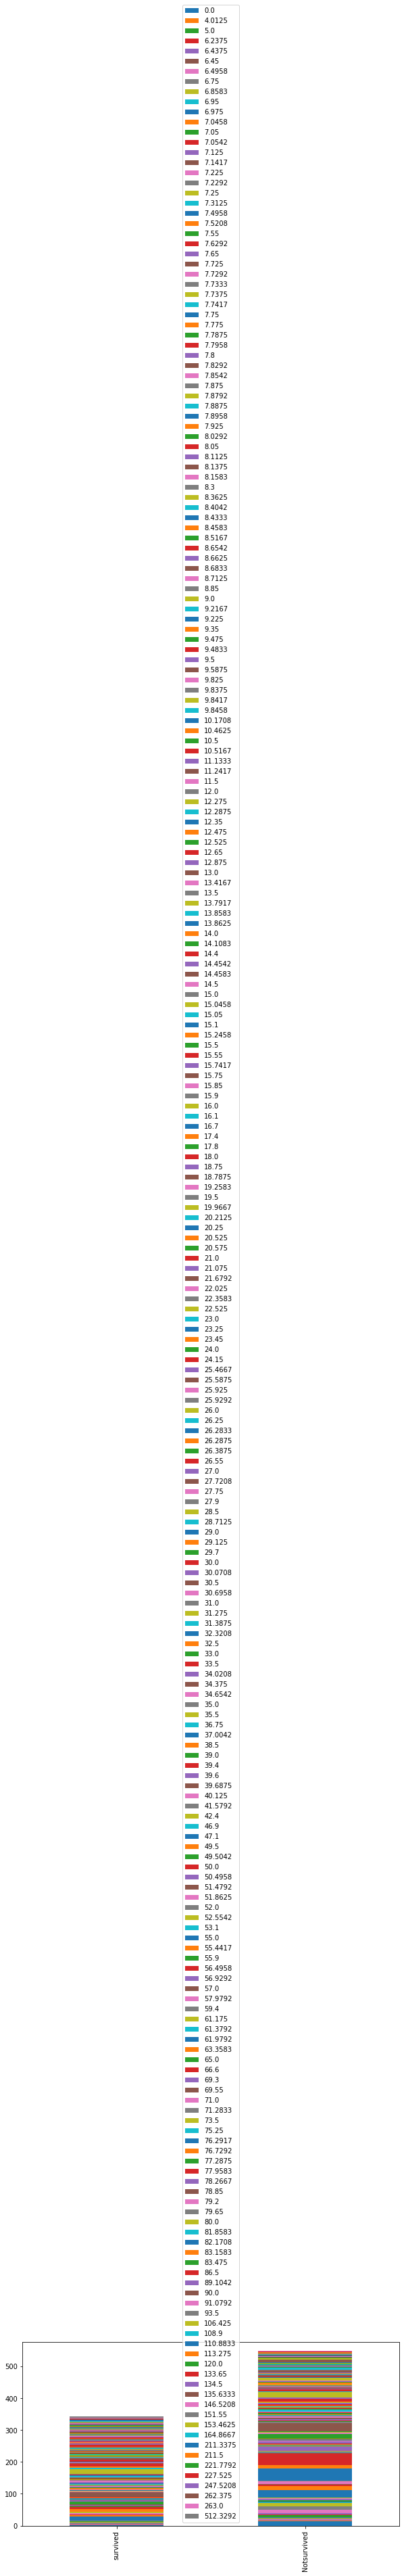

In [245]:
 #Servival chart for Fare
createBarChart('Fare')
#Analysis -> 

In [251]:
#Change string value in categorial value
df['Sex']=df['Sex'].replace('male',1)
df['Sex']=df['Sex'].replace('female',0)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [252]:
#Check for missing values
df.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [253]:
#fill missing value with median
df.Age=df.Age.fillna(df.Age.median())
df.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [254]:
# separete dependent and independent variable 
X = df[['Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare']]
y =df['Survived']

In [255]:
# Split the data for test and train
from sklearn import model_selection

In [256]:
#Test and Train split
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 6), (268, 6), (623,), (268,))

In [257]:
# create decision tree model 
from sklearn.tree import DecisionTreeClassifier

#Decision tree model with defalt criteria
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [258]:
#Training accuracy
dtree.score(X_train,y_train)

0.9791332263242376

In [259]:
#Test accuracy
dtree.score(X_test,y_test)

0.7985074626865671

In [260]:
dtree.score(X_test,y_test)

0.7985074626865671

In [261]:
y_pred_dt= dtree.predict(X_test)
confusion_matrix(y_test,y_pred_dt)

array([[146,  22],
       [ 32,  68]])

In [49]:
#Since difference between test and train accuracy is very high, i.e. its overfitting 
#So we have to improve the the model by chaning few parameters

In [262]:
dtree1 = DecisionTreeClassifier(criterion='entropy', max_depth=4,min_samples_split=3)
dtree1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [263]:
dtree1.score(X_train,y_train)

0.8426966292134831

In [264]:
y_pred_dt1= dtree1.predict(X_test)
confusion_matrix(y_test,y_pred_dt1)

array([[148,  20],
       [ 27,  73]])

In [265]:
#Cross Validation 
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator= bestModel, # Model to test
                         X= X,
                        y = y, # Target variable
                        scoring = "accuracy", # Scoring metric
                        cv=10) # Cross validation folds
print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.72222222 0.85555556 0.76404494 0.86516854 0.83146067 0.7752809
 0.79775281 0.7752809  0.83146067 0.85227273]
Average accuracy:  0.8070499943252752


In [266]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.grid_search import GridSearchCV

In [267]:
#Create funcation to perform GridSearchwith cross validation and return the accuracy
def GridSearchBestParam(X,y,clf,param_grid,cv=10):
    gridSearch = GridSearchCV(clf,param_grid=param_grid,cv=cv)
    start = time()
    gridSearch.fit(X,y)
    top_grid_param= gridSearch.grid_scores_
    return top_grid_param

In [268]:
param_grid= {"criterion":["gini","entropy"],
             "splitter": ["best","random"],
             "max_depth":[3,4,5,6,7,9,11,13],
             "min_samples_leaf":[3,5,7,9,11]
            }

In [269]:
#Cerate classifier
cvDT= DecisionTreeClassifier()

In [270]:
#get the top parameter for model
top_para=GridSearchBestParam(X_train,y_train,cvDT,param_grid,cv=10)
#Sort the mode
top_score=sorted(top_para,key=itemgetter(1),reverse=True)
#top_score

In [271]:
#pring the best suited model
bestParam=top_score[0].parameters
bestParam

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 5,
 'splitter': 'best'}

In [272]:
#run the model with best parameter
bestModel = DecisionTreeClassifier(criterion=bestParam['criterion'], max_depth=bestParam['max_depth'],
            min_samples_leaf=bestParam['min_samples_leaf'], min_samples_split=5,splitter=bestParam['splitter'])
bestModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [273]:
bestModel.score(X_train,y_train)

0.841091492776886

In [274]:
bestModel.score(X_test,y_test)

0.8246268656716418

In [275]:
#Create Confusion metrics check prediction
y_pred_best= bestModel.predict(X_test)
confusion_matrix(y_test,y_pred_best)

array([[150,  18],
       [ 29,  71]])

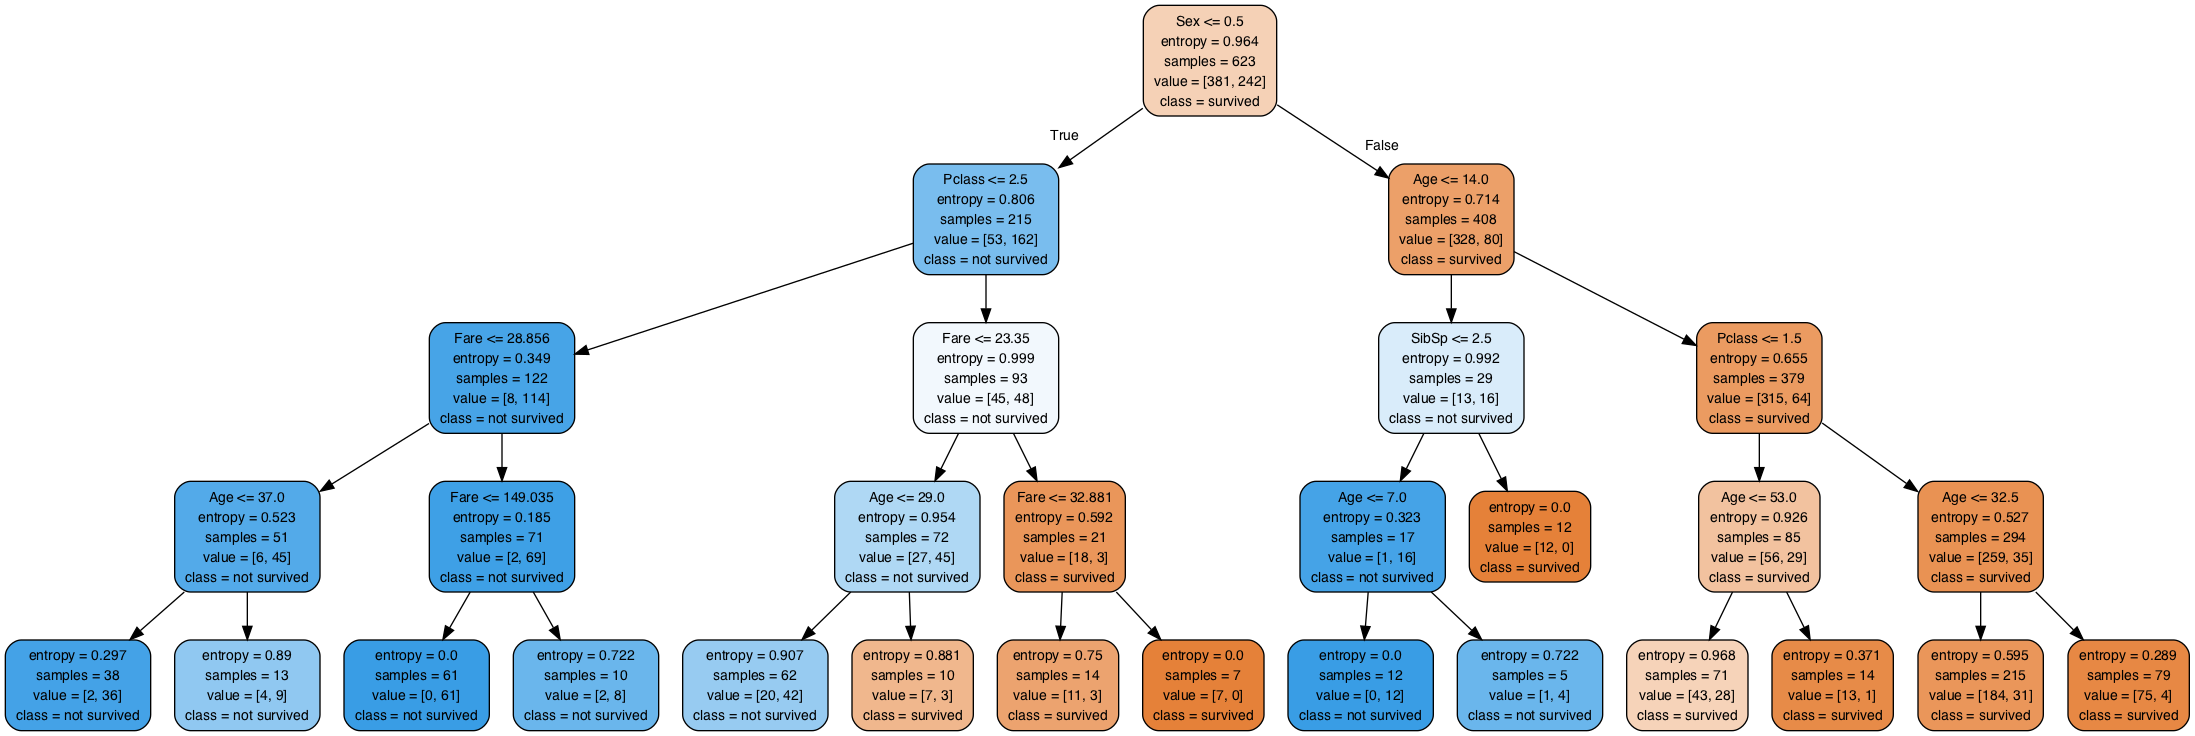

In [276]:
from sklearn import tree
from IPython.display import Image, display
from sklearn.tree import export_graphviz
import pydotplus 
dot_data = export_graphviz(bestModel, out_file=None, filled=True, rounded=True,
feature_names=['Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare'],
class_names=['survived', 'not survived'])
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))